In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [5]:
ps = pd.read_excel("C:\\Users\\kanis\\Documents\\New folder\\Forecasting\\CocaCola_Sales_Rawdata.xlsx")
ps.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot:>

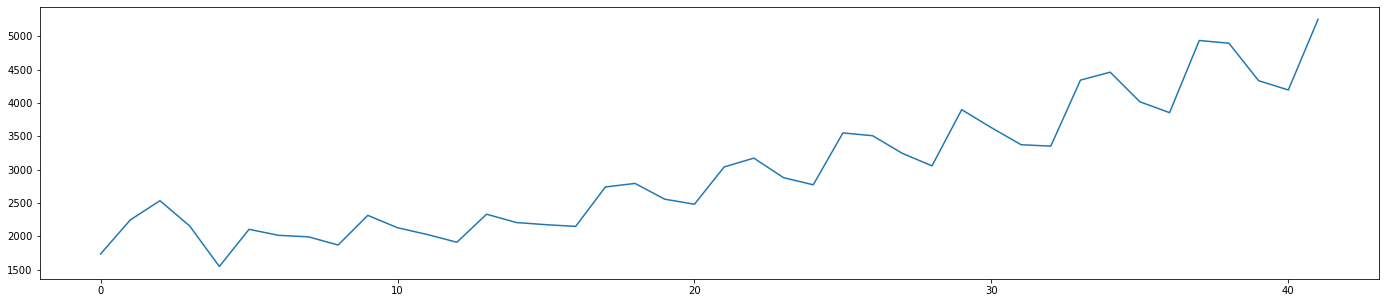

In [6]:
plt.figure(figsize=(24,5))
ps.Sales.plot()

In [7]:
Train = ps.head(38)
Test = ps.tail(4)

##Moving Average

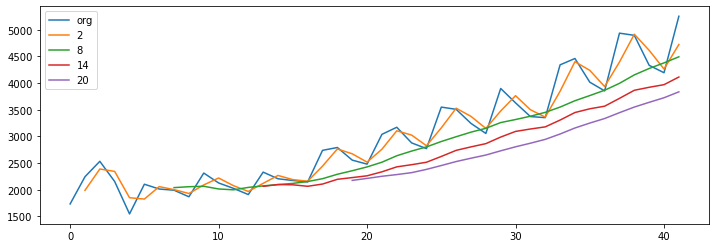

In [8]:
plt.figure(figsize=(12,4))
ps.Sales.plot(label="org")
for i in range(2,24,6):
    ps["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

##Time series decomposition plot

<ipython-input-9-c07f4225c867>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(ps.Sales,freq=4)


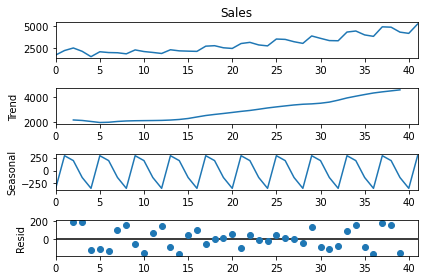

In [9]:
decompose_ts_add = seasonal_decompose(ps.Sales,freq=4)
decompose_ts_add.plot()
plt.show()

##ACF plots and PACF plots

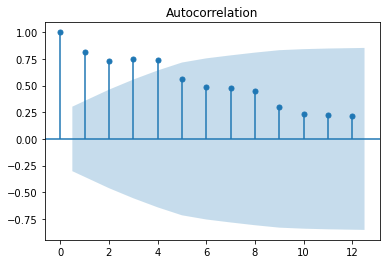

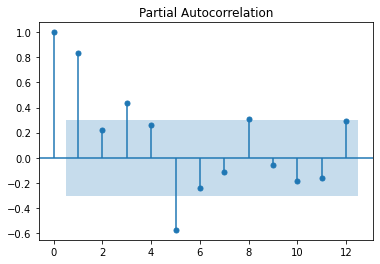

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(ps.Sales,lags=12)
tsa_plots.plot_pacf(ps.Sales,lags=12)
plt.show()

##Evaluation Metric MAPE

In [11]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

##Simple Exponential Method

In [12]:
ses_model = SimpleExpSmoothing(Train.Sales).fit(smoothing_level=0.5)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

C:\Users\public\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


8.304432971479478

##Holt method

In [13]:
# Holt method 
hw_model = Holt(Train.Sales).fit(smoothing_level=0.5, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

<ipython-input-13-292d79b13eef>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train.Sales).fit(smoothing_level=0.5, smoothing_slope=0.2)


9.240383094141023

##Holts winter exponential smoothing with additive seasonality and additive trend

In [14]:
hwe_model_add_add = ExponentialSmoothing(Train.Sales,seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

3.0261275743154394

##Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [15]:
hwe_model_mul_add = ExponentialSmoothing(Train.Sales,seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.555274828295127

##Final Model by combining train and test

In [16]:
hwe_model_add_add = ExponentialSmoothing(ps.Sales,seasonal="add",trend="add",seasonal_periods=4).fit()

In [17]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    5201.364899
43    4676.756835
44    4568.654846
45    5653.803963
46    5581.508495
47    5056.900431
48    4948.798441
49    6033.947559
50    5961.652091
51    5437.044027
dtype: float64